In [1]:
#本章需导入的模块
import numpy as np
from numpy import random,math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

In [2]:
data=pd.read_csv('汽车MPG.csv')
data=data.dropna()
data.head()

,MPG,cylinders,displacement,horsepower,weight,acceleration,carname
0,18.0,8,307.0,130.0,3504,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,ford torino


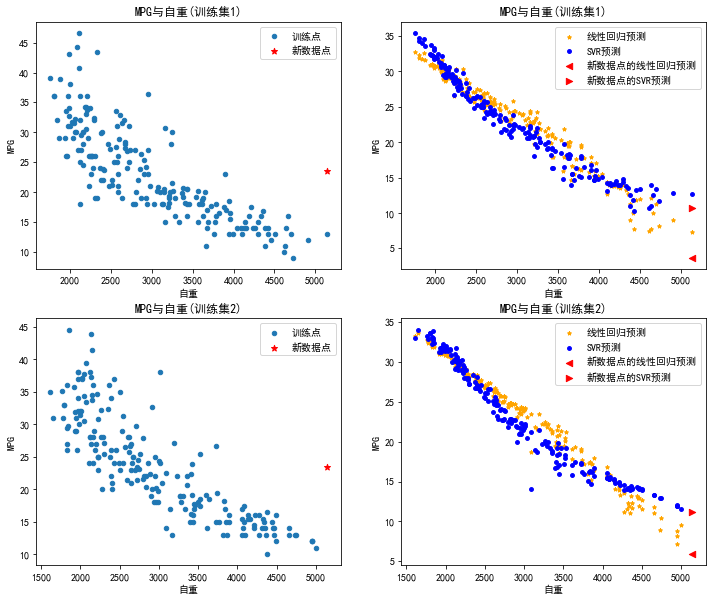

In [3]:
X=data[['weight','horsepower']]  
X0=[[X.max()[0],X.max()[1]]]
Y0=data['MPG'].mean()
modelLM=LM.LinearRegression()
modelSVR=svm.SVR(C=1000,epsilon=0.01)
yhat1=[]
yhat2=[]
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
kf = KFold(n_splits=2,shuffle=True,random_state=123)  # K折交叉验证法
H=0
for train_index, test_index in kf.split(X): 
    sample=data.iloc[train_index,]    
    X=sample[['weight','horsepower']]
    #Y=sample['MPG'].map(lambda x:math.log(x))
    Y=sample['MPG']
    modelLM.fit(X,Y)
    modelSVR.fit(X,Y)
    yhat1.append(modelLM.predict(X0))
    yhat2.append(modelSVR.predict(X0))
    
    axes[H,0].scatter(sample['weight'],sample['MPG'],s=20,label="训练点")
    axes[H,0].set_title("MPG与自重(训练集%d)"%(H+1))
    axes[H,0].set_xlabel("自重")
    axes[H,0].set_ylabel("MPG")
    axes[H,0].scatter(X0[0][0],Y0,c='r',s=40,marker='*',label="新数据点")
    axes[H,0].legend()
    
    axes[H,1].scatter(sample['weight'],modelLM.predict(X),s=15,marker='*',c='orange',label="线性回归预测")
    axes[H,1].scatter(sample['weight'],modelSVR.predict(X),s=15,marker='o',c='blue',label="SVR预测")
    axes[H,1].set_title("MPG与自重(训练集%d)"%(H+1))
    axes[H,1].set_xlabel("自重")
    axes[H,1].set_ylabel("MPG")
    axes[H,1].scatter(X0[0][0],modelLM.predict(X0),c='r',s=40,marker='<',label="新数据点的线性回归预测")
    axes[H,1].scatter(X0[0][0],modelSVR.predict(X0),c='r',s=40,marker='>',label="新数据点的SVR预测")  
    axes[H,1].legend()
    H+=1     


In [4]:
print("预测均值:线性回归=%f;SVR=%f)"%(np.mean(yhat1),np.mean(yhat2)))
print("预测方差:线性回归=%f;SVR=%f)"%(np.var(yhat1),np.var(yhat2)))

预测均值:线性回归=4.783981;SVR=10.972746)
预测方差:线性回归=1.193018;SVR=0.046484)
